Code pieces from http://mc-stan.org/users/documentation/case-studies/radon.html

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_context('notebook')

In [6]:
log_radon = [1, 5, 7, 2]
floor_measure = [ 1, 2, 3, 4]

In [8]:
pooled_data = """
data {
  int<lower=0> N; 
  vector[N] x;
  vector[N] y;
}
"""

pooled_parameters = """
parameters {
  vector[2] beta;
  real<lower=0> sigma;
} 
"""

pooled_model = """
model {
  y ~ normal(beta[1] + beta[2] * x, sigma);
}
"""

In [9]:
import pystan

pooled_data_dict = {'N': len(log_radon),
               'x': floor_measure,
               'y': log_radon}

pooled_fit = pystan.stan(model_code=pooled_data + pooled_parameters + pooled_model, 
                         data=pooled_data_dict, iter=1000, chains=2)


INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_dd6a876b770652d53bdcc0546345af4b NOW.


In [15]:
pooled_sample = pooled_fit.extract(permuted=True)
b0, m0 = pooled_sample['beta'].T.mean(1)

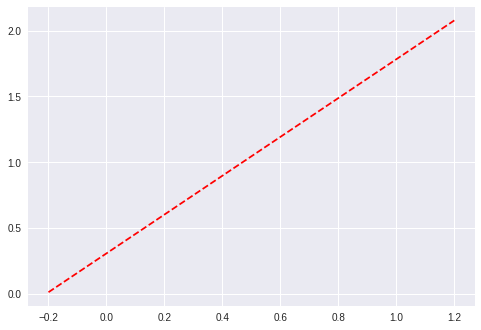

In [14]:
xvals = np.linspace(-0.2, 1.2)
plt.plot(xvals, m0*xvals+b0, 'r--')